# Basic Machine Learning

### A basic program demonstrating gradient descent and PMC

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

This function calculates the Product Moment Correlation from a list of X values and Y values.

In [3]:
# Todo: 1. Think about getting input as array instead of two seperate lists
#       2. Check the input data (e.g. len(Xlist) == len(Ylist))

def ProductMomentCorrelator(Xlist, Ylist):
    sumX = 0
    sumY = 0
    sumXsqrd = 0
    sumYsqrd = 0
    sumXY = 0
    n = len(Xlist)
    
    for i in range(0, len(Xlist)):
        sumX += float(Xlist[i])
        sumY += float(Ylist[i])
        sumXsqrd += float((Xlist[i])) ** 2
        sumYsqrd += float((Ylist[i])) ** 2
        sumXY += float(Xlist[i] * Ylist[i])
        
    Sxy = sumXY - (sumX*sumY)/n
    Sxx = sumXsqrd - (sumX**2)/n
    Syy = sumYsqrd - (sumY**2)/n
    
    PMC = Sxy/((Sxx*Syy)**0.5)
    
    return(PMC)

In [5]:
rng = np.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

np.random.seed(20)
train_X = np.random.rand(17) * 10
train_Y = np.random.rand(17) * 10

# Training Data
#train_X = np.asarray([3.3,4.4,5.5,6.61,6.93,4.168,9.779,6.182,7.59,2.167,
#                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
#train_Y = np.asarray([1.7,2.76,2.09,2.59,1.694,1.873,3.366,2.596,2.53,1.221,
#                         2.827,3.465,2.35,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [6]:
result = ProductMomentCorrelator(train_X, train_Y)
print(result)

0.0032963459224377876


In [7]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 4.534976006 W= 0.482811 b= 2.049
Epoch: 0100 cost= 4.273777485 W= 0.431727 b= 2.40683
Epoch: 0150 cost= 4.065860271 W= 0.386152 b= 2.72606
Epoch: 0200 cost= 3.900352955 W= 0.345493 b= 3.01087
Epoch: 0250 cost= 3.768604040 W= 0.309219 b= 3.26496
Epoch: 0300 cost= 3.663725376 W= 0.276856 b= 3.49165
Epoch: 0350 cost= 3.580234528 W= 0.247984 b= 3.69389
Epoch: 0400 cost= 3.513770103 W= 0.222225 b= 3.87432
Epoch: 0450 cost= 3.460857153 W= 0.199244 b= 4.0353
Epoch: 0500 cost= 3.418731928 W= 0.178741 b= 4.17892
Epoch: 0550 cost= 3.385198355 W= 0.16045 b= 4.30703
Epoch: 0600 cost= 3.358498573 W= 0.144131 b= 4.42134
Epoch: 0650 cost= 3.337241173 W= 0.129573 b= 4.52332
Epoch: 0700 cost= 3.320316553 W= 0.116585 b= 4.6143
Epoch: 0750 cost= 3.306841135 W= 0.104998 b= 4.69546
Epoch: 0800 cost= 3.296109915 W= 0.0946595 b= 4.76788
Epoch: 0850 cost= 3.287564278 W= 0.0854359 b= 4.83249
Epoch: 0900 cost= 3.280758381 W= 0.0772066 b= 4.89013
Epoch: 0950 cost= 3.275338411 W= 0.0698656 b= 4.

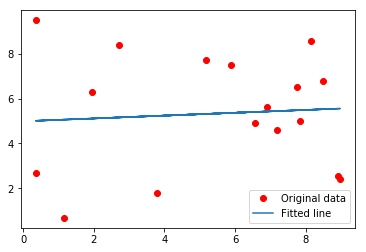

In [8]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()